In [1]:
#Importing important modules and libralies

import os
import tensorflow as tf
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools
from tensorflow.keras.preprocessing import image

In [2]:
#Customising the modules

mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

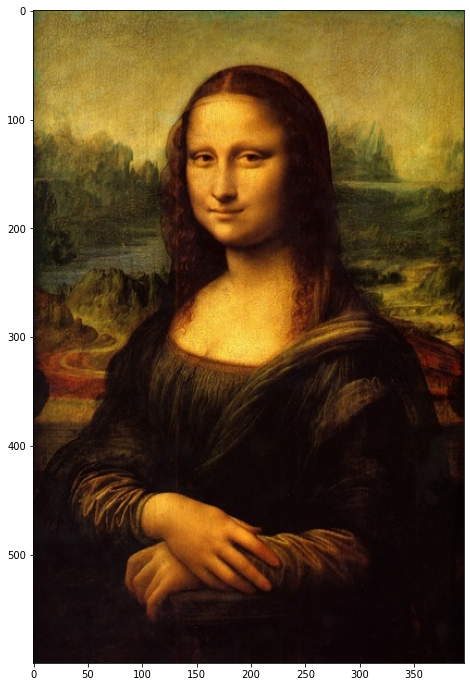

In [10]:
#Loading images

content_image_path = image.load_img('images/content.jpg')
style_image_path = image.load_img('images/style.jpg')

plt.imshow(content_image_path)
plt.imshow(style_image_path)

In [11]:
#Function for customising tensor for image processing

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [12]:
#Function for visualizing and loading of an input image

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [13]:
#Function for displaying an image

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [16]:
# #Loading the images

style_image = load_img(style_image_path)
content_image = load_img(content_image_path)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [20]:
#Showing the image

# plt.subplot(1, 2, 1)
# imshow(content_image, 'content Image')

# plt.subplot(1, 2, 2)
# imshow(style_image, 'style Image')

In [21]:
#Loading the Tensorflow hub model

# hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [22]:
#Resulted stylized image

# stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
# tensor_to_image(stylized_image)